In [204]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from joblib import dump
from matplotlib import pyplot
import random
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

### 1. Creación del DataFrame

In [206]:
# Setting the seed for reproducibility
np.random.seed(42)

In [207]:
zona_options = ["Norte", "Centro", "Sur"]
estado_civil_options = ["Soltero", "Casado", "Divorciado"]

In [208]:
marca_modelo_options = {
    "BMW": ["3 Series", "5 Series", "X3", "X5", "7 Series"]
}
tipo_auto_options = {
    "3 Series": "Sedan",
    "5 Series": "Sedan",
    "X3": "SUV",
    "X5": "SUV",
    "7 Series": "Sedan"
}
motor_options = {
    "3 Series": ["2.0L", "3.0L"],
    "5 Series": ["2.0L", "3.0L"],
    "X3": ["2.0L", "3.0L"],
    "X5": ["3.0L", "4.4L"],
    "7 Series": ["3.0L", "4.4L"]
}
transmision_options = ["Automática", "Manual"]
color_exterior_options = ["Rojo", "Azul", "Negro", "Blanco", "Gris"]
color_interior_options = ["Negro", "Gris", "Beige"]
interior_options = ["Tela", "Cuero"]
compra_options = ["Nuevo", "Usado"]
pago_options = ["Contado", "Crédito"]
plazo_credito_options = ["12 meses", "24 meses", "36 meses", "48 meses", "60 meses", "72 meses"]
enganche_options = ["<25%", ">25%"]
canal_atraccion_options = ["Piso", "Teléfono", "Redes", "Website", "Email", "Móvil", "No_piso"]

In [209]:
data = {
    "id_cliente": range(1, 10001),
    "edad": np.random.normal(loc=35, scale=10, size=10000).astype(int),
    "género": np.random.choice(["M", "F"], 10000),
    "estado_civil": np.random.choice(estado_civil_options, 10000),
    "num_hijos": np.random.normal(loc = 2, scale=1 , size= 10000).astype(int),
    "zona": np.random.choice(zona_options, 10000),
    "transmisión": np.random.choice(transmision_options, 10000),
    "color_exterior": np.random.choice(color_exterior_options, 10000),
    "color_interior": np.random.choice(color_interior_options, 10000),
    "tipo_interior": np.random.choice(interior_options, 10000),
    "compra": np.random.choice(compra_options, 10000),
    "pago": np.random.choice(pago_options, 10000),
    "plazo_credito": np.random.choice(plazo_credito_options, 10000),
    "enganche": np.random.choice(enganche_options, 10000),
    "canal_atracción": np.random.choice(canal_atraccion_options, 10000)
}   

In [210]:
data["marca"] = []
data["modelo"] = []
data["tipo_auto"] = []
data["motor"] = []


for _ in range(10000):
    marca = "BMW"
    modelo = np.random.choice(marca_modelo_options[marca])
    tipo_de_auto = tipo_auto_options[modelo]
    motor = np.random.choice(motor_options[modelo])
    
    data["marca"].append(marca)
    data["modelo"].append(modelo)
    data["tipo_auto"].append(tipo_de_auto)
    data["motor"].append(motor)

In [211]:
df = pd.DataFrame(data)

In [212]:
df.loc[df["pago"] == "Contado", ['plazo_credito', 'enganche']] = "NA"

In [213]:
df['edad'] = df['edad'].clip(lower=25, upper=70)
#df['ingreso_anual'] = df['ingreso_anual'].clip(lower=20000, upper=100000)

In [214]:
df.head()

,id_cliente,edad,género,estado_civil,num_hijos,zona,transmisión,color_exterior,color_interior,tipo_interior,compra,pago,plazo_credito,enganche,canal_atracción,marca,modelo,tipo_auto,motor
0,1,39,F,Soltero,2,Norte,Automática,Negro,Beige,Tela,Usado,Contado,NA,NA,Teléfono,BMW,7 Series,Sedan,3.0L
1,2,33,F,Soltero,2,Norte,Automática,Rojo,Negro,Tela,Nuevo,Contado,NA,NA,Email,BMW,X3,SUV,2.0L
2,3,41,M,Soltero,1,Sur,Automática,Blanco,Beige,Cuero,Usado,Crédito,72 meses,>25%,Website,BMW,5 Series,Sedan,3.0L
3,4,50,M,Casado,2,Norte,Manual,Gris,Negro,Cuero,Usado,Contado,NA,NA,Website,BMW,7 Series,Sedan,4.4L
4,5,32,M,Soltero,1,Norte,Manual,Negro,Negro,Cuero,Nuevo,Crédito,72 meses,>25%,Website,BMW,X3,SUV,3.0L


In [215]:
df[['pago','plazo_credito','enganche']]

,pago,plazo_credito,enganche
0,Contado,NA,NA
1,Contado,NA,NA
2,Crédito,72 meses,>25%
3,Contado,NA,NA
4,Crédito,72 meses,>25%
...,...,...,...
9995,Crédito,12 meses,<25%
9996,Crédito,24 meses,>25%
9997,Contado,NA,NA
9998,Crédito,24 meses,<25%


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_cliente       10000 non-null  int64 
 1   edad             10000 non-null  int32 
 2   género           10000 non-null  object
 3   estado_civil     10000 non-null  object
 4   num_hijos        10000 non-null  int32 
 5   zona             10000 non-null  object
 6   transmisión      10000 non-null  object
 7   color_exterior   10000 non-null  object
 8   color_interior   10000 non-null  object
 9   tipo_interior    10000 non-null  object
 10  compra           10000 non-null  object
 11  pago             10000 non-null  object
 12  plazo_credito    10000 non-null  object
 13  enganche         10000 non-null  object
 14  canal_atracción  10000 non-null  object
 15  marca            10000 non-null  object
 16  modelo           10000 non-null  object
 17  tipo_auto        10000 non-null 

In [217]:
df.isna().sum()

id_cliente         0
edad               0
género             0
estado_civil       0
num_hijos          0
zona               0
transmisión        0
color_exterior     0
color_interior     0
tipo_interior      0
compra             0
pago               0
plazo_credito      0
enganche           0
canal_atracción    0
marca              0
modelo             0
tipo_auto          0
motor              0
dtype: int64

### 2. Análisis Exploratorio de Datos

In [219]:
grouped_counts = df.groupby(['género', 'estado_civil']).size().reset_index(name='counts')

C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

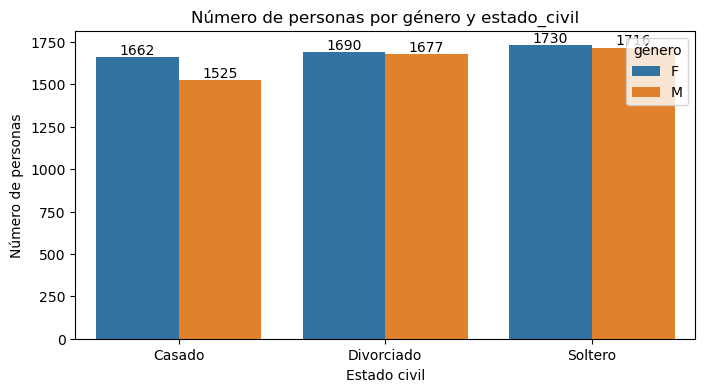

In [220]:
# Create the bar chart
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=grouped_counts, x='estado_civil', y='counts', hue='género')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Número de personas por género y estado_civil')
plt.ylabel('Número de personas')
plt.xlabel('Estado civil')
plt.show()

C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

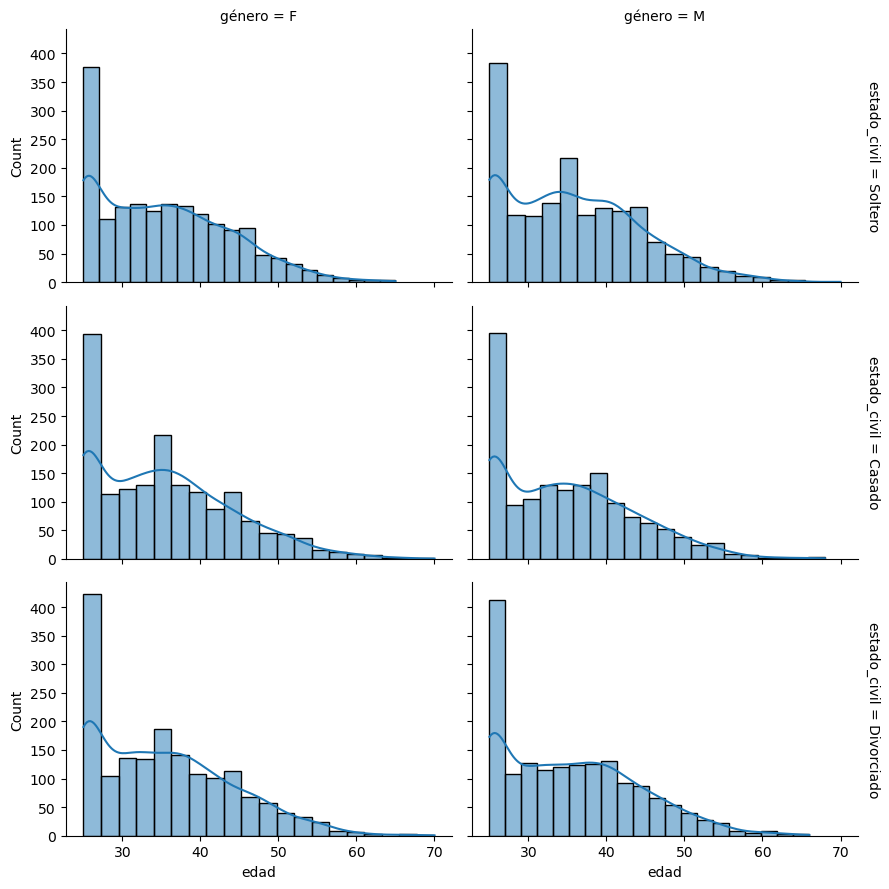

In [221]:
g = sns.FacetGrid(df, col="género", row="estado_civil", margin_titles=True, height=3, aspect=1.5)

# Map the histogram plot to the grid
g.map(sns.histplot, "edad", bins=20, kde=True)

# Add annotations with the total number of data points
for ax in g.axes.flatten():
    # Get the title of the axis which contains the row/col facet information
    title = ax.get_title()
    
    # Extract the corresponding subset of data based on facet labels
    if 'sexo' in title and 'estado_civil' in title:
        sex_label = title.split('|')[1].split('= ')[1].strip()
        civil_status_label = title.split('|')[0].split('= ')[1].strip()
    
        # Get the number of data points in the current facet
        num_data_points = df[(df['género'] == sex_label) & (df['estado_civil'] == civil_status_label)].shape[0]
    
        # Annotate the plot with the total number of data points
        ax.text(0.5, 0.9, f'Total: {num_data_points}', transform=ax.transAxes, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()

C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


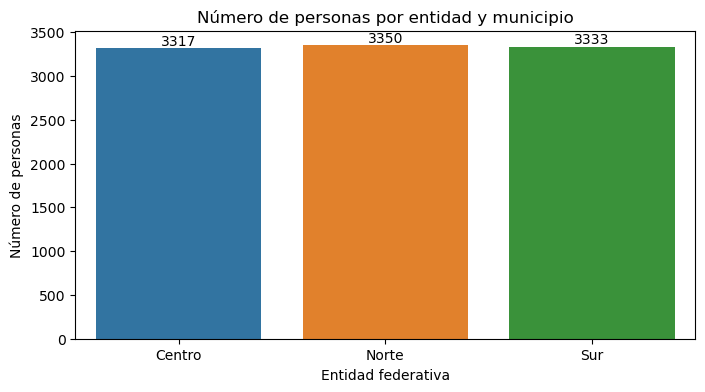

In [222]:
grouped_counts = df.groupby(['zona']).size().reset_index(name='counts')

# Create the bar chart
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=grouped_counts, x='zona', y='counts')


# Add annotations
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')


plt.title('Número de personas por entidad y municipio')
plt.ylabel('Número de personas')
plt.xlabel('Entidad federativa')
plt.show()

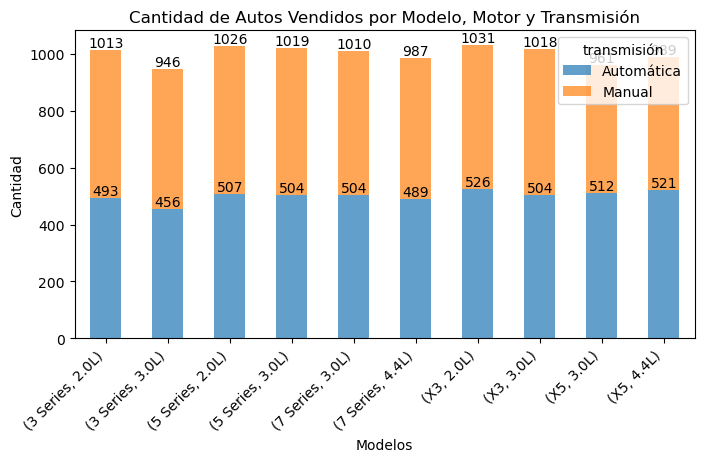

In [223]:
engine_trans_data = df.groupby(['modelo', 'motor', 'transmisión']).size().unstack(fill_value=0)

# Plot the grouped data with adjusted figure size
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the figure size here (width, height)
engine_trans_data.plot(kind='bar', stacked=True, alpha=0.7, ax=ax, title='Cantidad de Autos vendidos por modelo, motor y transmisión')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.xlabel('Modelos')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Autos Vendidos por Modelo, Motor y Transmisión')
plt.show()

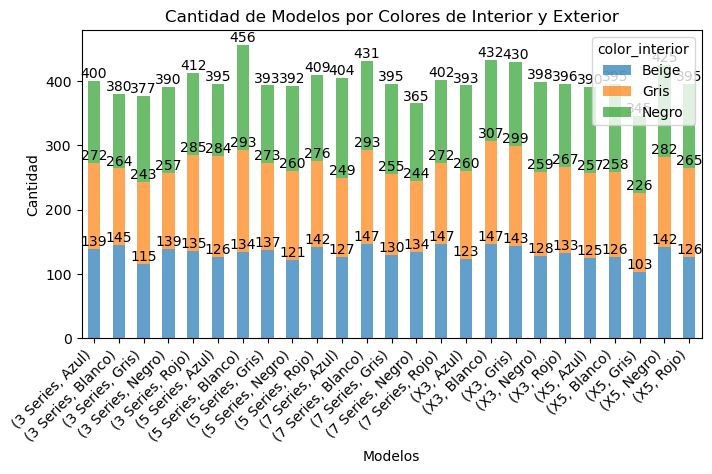

In [224]:
interior_exterior_data = df.groupby(['modelo', 'color_exterior', 'color_interior']).size().unstack(fill_value=0)

# Plot the grouped data
ax = interior_exterior_data.plot(kind='bar', stacked=True, alpha=0.7, figsize=(8, 4), title='Cantidad de Modelos por Colores de Interior y Exterior')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.xlabel('Modelos')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Conversión y escalación de datos

In [226]:
# Specifying the columns to be encoded
categorical_columns = ["género", "zona", "estado_civil", 
                       "marca", "modelo", "motor", "transmisión", "tipo_auto", "tipo_interior", 
                       "color_exterior", "color_interior", "compra", "pago", 
                       "plazo_credito", "enganche", "canal_atracción"]

# Applying One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Converting the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Dropping the original categorical columns from the original DataFrame
df.drop(columns=categorical_columns, inplace=True)

# Concatenating the encoded DataFrame with the remaining original DataFrame
data_for_model = pd.concat([df, encoded_df], axis=1).drop(["id_cliente"], axis=1)
data_for_model.head()

C:\Users\festu\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,edad,num_hijos,género_F,género_M,zona_Centro,zona_Norte,zona_Sur,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,...,enganche_<25%,enganche_>25%,enganche_NA,canal_atracción_Email,canal_atracción_Móvil,canal_atracción_No_piso,canal_atracción_Piso,canal_atracción_Redes,canal_atracción_Teléfono,canal_atracción_Website
0,39,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,33,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,50,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [227]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_model)

scaled_features.shape

(10000, 54)

### 4. Ajuste de parámetros

C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

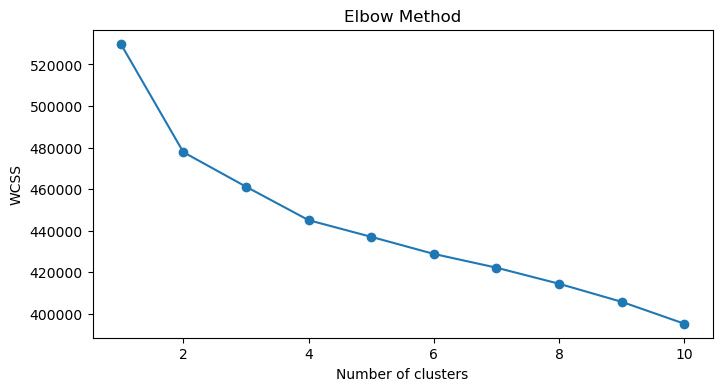

In [229]:
# Elbow Method to find the optimal number of clusters
wcss = []

# Run K-means for a range of cluster numbers (e.g., 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    
# Plot WCSS vs. number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

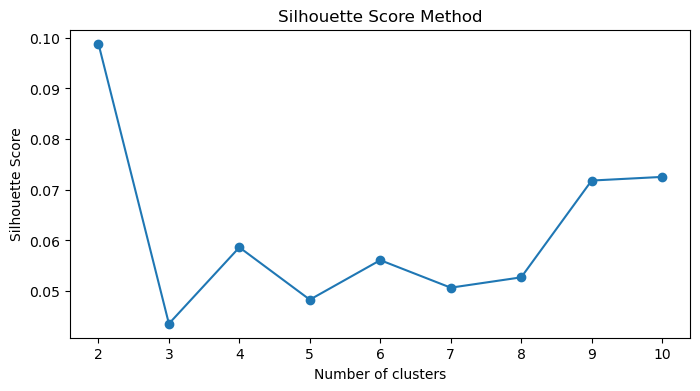

In [230]:
# Silhouette Score to evaluate the optimal number of clusters
silhouette_scores = []

# Run K-means for a range of cluster numbers (e.g., 2 to 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores vs. number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### 5. Creación del modelo KNN

In [232]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the scaled data
data_for_model['cluster'] = kmeans.fit_predict(scaled_features)

data_for_model.shape

C:\Users\festu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10000, 55)

In [233]:
# Inverse transform the cluster centers to original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data_for_model.drop(['cluster'],axis=1).columns)

# Print the cluster centers
cluster_centers_df.shape

(4, 54)

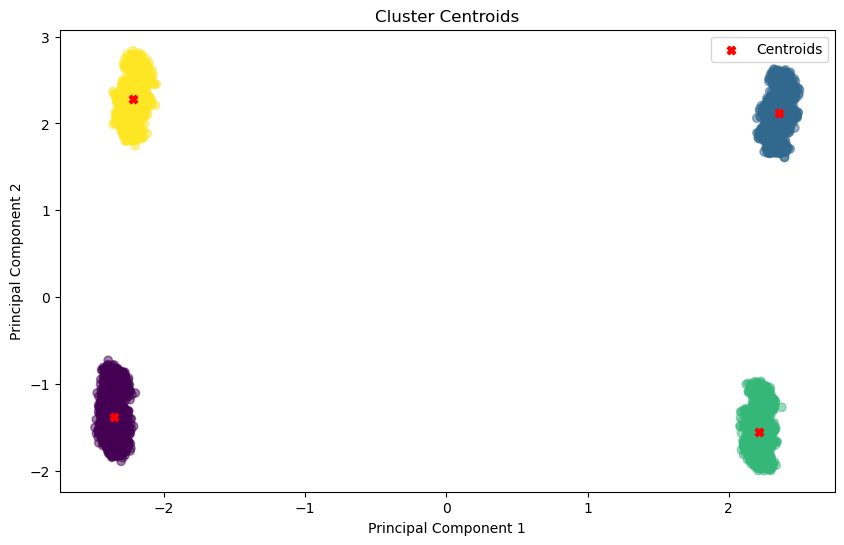

In [234]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data_for_model['cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='red', marker='X', label='Centroids')
plt.title('Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [235]:
print(centroids_pca[:, 0])
print(centroids_pca[:, 1])

[-2.35082926  2.35125084  2.21518322 -2.21624471]
[-1.37964524  2.12213788 -1.55353946  2.28169104]


### 6. Visualización de los parámetros principales

In [237]:
# Prepare the data
X = data_for_model.drop(columns=["cluster"])
y = kmeans.labels_

# Train the decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Extract feature importances
feature_importances = tree_clf.feature_importances_
features = X.columns

C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


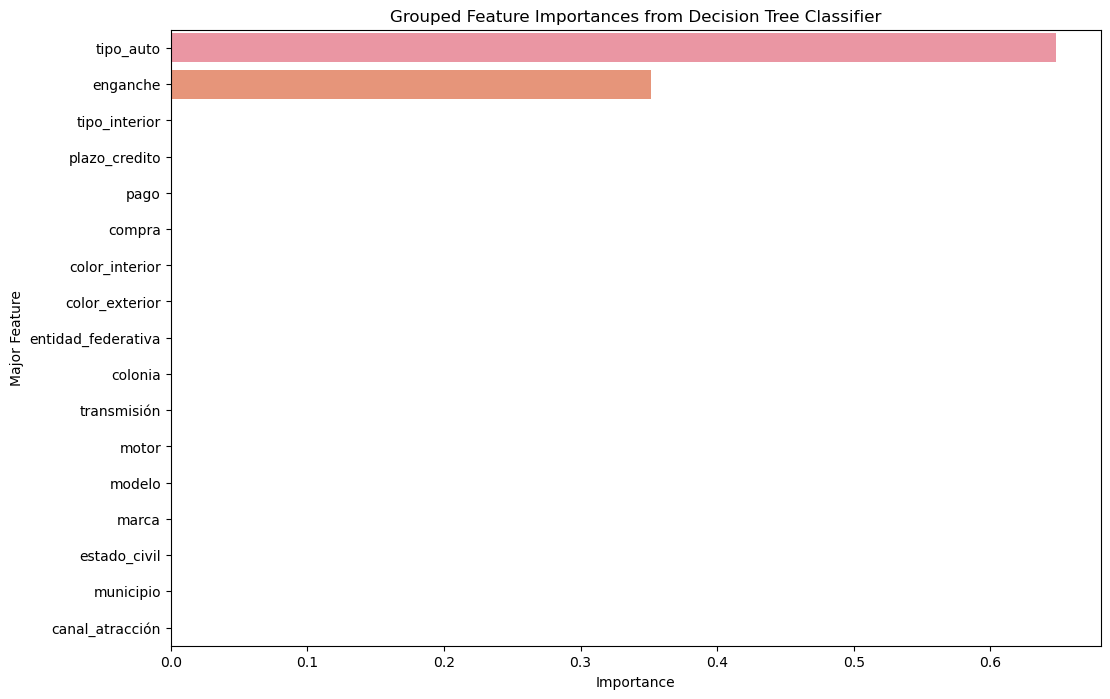

In [238]:
major_feature_groups = {
    'entidad_federativa': [col for col in features if col.startswith('entidad_federativa')],
    'colonia': [col for col in features if col.startswith('colonia')],
    'municipio': [col for col in features if col.startswith('municipio')],
    'estado_civil': [col for col in features if col.startswith('estado_civil')],
    'marca': [col for col in features if col.startswith('marca')],
    'modelo': [col for col in features if col.startswith('modelo')],
    'motor': [col for col in features if col.startswith('motor')],
    'transmisión': [col for col in features if col.startswith('transmisión')],
    'tipo_auto': [col for col in features if col.startswith('tipo_auto')],
    'tipo_interior': [col for col in features if col.startswith('tipo_interior')],
    'color_exterior': [col for col in features if col.startswith('color_exterior')],
    'color_interior': [col for col in features if col.startswith('color_interior')],
    'compra': [col for col in features if col.startswith('compra')],
    'pago': [col for col in features if col.startswith('pago')],
    "plazo_credito": [col for col in features if col.startswith('plazo_credito')],
    "enganche": [col for col in features if col.startswith('enganche')],
    "canal_atracción": [col for col in features if col.startswith('canal_atracción')]
}

grouped_importances = {key: feature_importances[[features.get_loc(f) for f in value]].sum() for key, value in major_feature_groups.items()}

# Create a DataFrame for visualization
grouped_importance_df = pd.DataFrame({
    'Major Feature': grouped_importances.keys(),
    'Importance': grouped_importances.values()
}).sort_values(by='Importance', ascending=False)

# Plot the grouped feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Major Feature', data=grouped_importance_df)
plt.title('Grouped Feature Importances from Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Major Feature')
plt.show()

In [239]:
# Calculate mean feature values per cluster
cluster_means = data_for_model.groupby('cluster').mean()

# Calculate the difference from the overall mean
overall_means = data_for_model.mean()
diff_from_overall = cluster_means - overall_means

# Identify top features that differentiate each cluster
top_features_per_cluster = diff_from_overall.abs().idxmax(axis=1)

# Extract top features and their differences for a detailed description
top_features = diff_from_overall.abs().max(axis=1)
description_df = pd.DataFrame({
    'Cluster': diff_from_overall.index,
    'Top Feature': top_features_per_cluster,
    'Importance': top_features
}).sort_values(by='Importance', ascending=False)

#tools.display_dataframe_to_user(name="Top Features Describing Each Cluster", dataframe=description_df)

description_df.sort_values(by = "Importance", ascending = False)

,Cluster,Top Feature,Importance
cluster,,,
1,1,tipo_auto_SUV,0.6001
3,3,tipo_auto_SUV,0.6001
0,0,enganche_NA,0.5030
2,2,enganche_NA,0.4970


In [240]:
df = pd.DataFrame(data)

In [241]:
df.loc[df["pago"] == "Contado", ['plazo_credito', 'enganche']] = "NA"

In [242]:
df['Customer_Category'] = data_for_model['cluster'].map({
    0: 'Category 1',
    1: 'Category 2',
    2: 'Category 3',
    3: 'Category 4',
    4: 'Category 5',
    5: 'Category 6',
})

In [243]:
df.to_csv('Clientes autos nuevos.csv', index=False)